<a href="https://colab.research.google.com/github/ProkhorKondratev/KondratevPV_Neural/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%962.%20%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическая работа №2. Задание 2.

1.1 Загрузка данных

In [48]:
import cv2
import os
import numpy as np

data_path = '/content/drive/MyDrive/Neural_class_data'
class_dirs = []

data = []
labels = []

for file in os.listdir(data_path):
  class_dirs.append(os.path.join(data_path,file))

for class_dir in class_dirs:
  for image in os.listdir(class_dir):
    image_path = os.path.join(class_dir, image)
    image_label = image_path.split(os.path.sep)[-2]
    
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
    labels.append(image_label)

print(f'Загружено {len(data)} изображений и {len(labels)} меток')

Загружено 3000 изображений и 3000 меток


1.2 Нормализация данных

In [50]:
from keras.utils import to_categorical
data = np.array(data, dtype="float") / 255.0
label_to_int = {"lions": 0, "zebra": 1, "elephant": 2}
int_labels = [label_to_int[label] for label in labels]

class_labels = to_categorical(int_labels)

# labels = np.array(labels)
# label_to_int = {"lions": 0, "zebra": 1, "elephant": 2}
# int_labels = [label_to_int[label] for label in labels]

# labels = to_categorical(int_labels)
# labels

array([0.00179931, 0.0028912 , 0.00276817, ..., 0.00181469, 0.00269127,
       0.00255286])

1.3 Разбивка на обучающую выборку и выборку валидации

In [51]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(data, class_labels, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2)

1.4 Создание архитектуры нейронной сети

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

model = Sequential()

model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

1.5 Компиляция нейронной сети

In [53]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
print(f'Используемый оптимизатор: {model.optimizer.name}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)              

1.6 Обучение нейронной сети

In [54]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_valid, y_valid), verbose=True)

Epoch 1/50
2/2 [==============================] - 3s 940ms/step - loss: 1.0983 - accuracy: 0.3443 - val_loss: 1.0952 - val_accuracy: 0.4646
Epoch 2/50
2/2 [==============================] - 1s 679ms/step - loss: 1.0959 - accuracy: 0.3807 - val_loss: 1.0881 - val_accuracy: 0.4729
Epoch 3/50
2/2 [==============================] - 1s 694ms/step - loss: 1.0900 - accuracy: 0.4146 - val_loss: 1.0769 - val_accuracy: 0.5104
Epoch 4/50
2/2 [==============================] - 1s 674ms/step - loss: 1.0770 - accuracy: 0.4885 - val_loss: 1.0514 - val_accuracy: 0.5333
Epoch 5/50
2/2 [==============================] - 1s 378ms/step - loss: 1.0586 - accuracy: 0.5073 - val_loss: 1.0277 - val_accuracy: 0.5604
Epoch 6/50
2/2 [==============================] - 1s 370ms/step - loss: 1.0314 - accuracy: 0.5240 - val_loss: 0.9909 - val_accuracy: 0.5125
Epoch 7/50
2/2 [==============================] - 1s 447ms/step - loss: 1.0105 - accuracy: 0.5141 - val_loss: 0.9724 - val_accuracy: 0.5604
Epoch 8/50
2/2 [====

1.7 Оценка критерия качества работы нейронной сети с помощью представления на графике

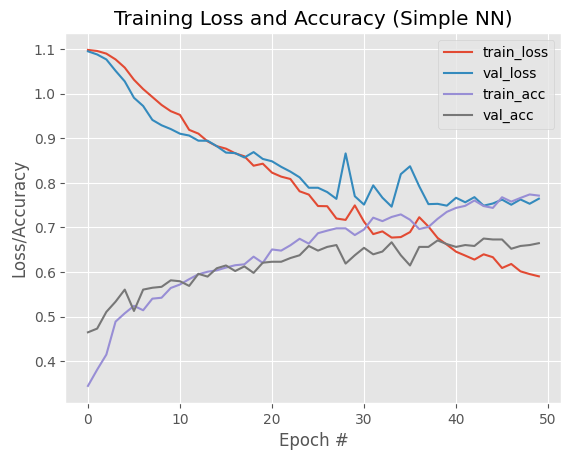

In [63]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

plt.grid(True)
plt.show()

1.8 Оценка критерия качества работы нейронной сети на тестовой выборке

In [64]:
neural_loss = model.evaluate(X_test, y_test)
neural_loss

19/19 [==============================] - 0s 10ms/step - loss: 0.6861 - accuracy: 0.7333


[0.6860584020614624, 0.7333333492279053]

1.9 Предсказание на тестовых данных

In [69]:
X_new = X_test[:10]
Y_new = y_test[:10]
y_pred = model.predict(X_new)

class_dict = {
    0: "львы",
    1: "зебры",
    2: "слоны"
}

for i in range(len(y_pred)):
  neural_res = y_pred[i].argmax()
  real_res = Y_new[i].argmax()
  print(f'Определено: {neural_res} ({class_dict[neural_res]})  Правильное: {real_res} ({class_dict[real_res]})')

1/1 [==============================] - 0s 29ms/step
Определено: 1 (зебры)  Правильное: 1 (зебры)
Определено: 1 (зебры)  Правильное: 1 (зебры)
Определено: 1 (зебры)  Правильное: 1 (зебры)
Определено: 0 (львы)  Правильное: 0 (львы)
Определено: 2 (слоны)  Правильное: 2 (слоны)
Определено: 0 (львы)  Правильное: 1 (зебры)
Определено: 1 (зебры)  Правильное: 1 (зебры)
Определено: 2 (слоны)  Правильное: 2 (слоны)
Определено: 0 (львы)  Правильное: 0 (львы)
Определено: 1 (зебры)  Правильное: 2 (слоны)


2.0 Сохранение обученной модели и меток классов на диск

In [70]:
import pickle

try:
  model.save('model.h5', save_format='h5')
  with open('label_bin', 'wb') as f:
    pickle.dump(class_dict, f)
  
  print('Успешное сохранение')

except Exception as error:
  print(error)

Успешное сохранение


2.1 Проверка обученной модели пользовательскими данными

In [79]:
from google.colab import files
uploaded = files.upload()

if uploaded:
  image = cv2.imread(list(uploaded.keys())[0])
  output = image.copy()
  image = cv2.resize(image, (32, 32))
  cv2.imshow(image)

In [ ]:
image = image.flatten()
image = image.astype("float") / 255.0
image = image.reshape((1, image.shape[0]))

In [80]:
from keras import models

model = models.load_model("model.h5")
lb = pickle.loads(open("label_bin", "rb").read())

user_predict = model.predict(image)
user_pred_index = user_predict.argmax()
label = lb.[i]
print(label)

<class 'dict'>
